<a href="https://colab.research.google.com/github/PSRINIVAS07/Basic-Chatbot/blob/main/viscosity_model%204%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import files

uploaded = files.upload()


Saving viscosity_final dataset.xlsm to viscosity_final dataset (3).xlsm


In [19]:
import os
os.listdir()


['.config',
 'viscosity_final dataset (3).xlsm',
 'viscosity_final dataset.xlsm',
 'viscosity_final dataset (2).xlsm',
 'viscosity_final dataset (1).xlsm',
 'sample_data']

In [20]:
import pandas as pd

vis_data = pd.read_excel("viscosity_final dataset.xlsm")
vis_data.head()


,Y_viscosity,X1_Temperature_C,X2_Concentration,X3_BaseFluid_viscosity
0,0.01690,25,0.0,0.0169
1,0.01792,25,0.5,0.0169
2,0.01904,25,1.0,0.0169
3,0.02056,25,1.5,0.0169
4,0.02279,25,2.0,0.0169


GAUSSIAN PROCESS REGRESSION (GPR)

In [21]:
import numpy as np
import pandas as pd

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [22]:
X = vis_data[['X1_Temperature_C',
              'X2_Concentration',
              'X3_BaseFluid_viscosity']]

y = vis_data['Y_viscosity'].values.reshape(-1, 1)


In [23]:
# STEP 3: Initialize scalers
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

# STEP 3: Scale input and output data
X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y).ravel()


In [24]:
# STEP 4: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)


In [25]:
# STEP 5: Define kernel (Constant × RBF + Noise)
kernel = C(1.0, (1e-3, 1e3)) * \
         RBF(length_scale=[1.0, 1.0, 1.0],
             length_scale_bounds=(1e-2, 1e2)) + \
         WhiteKernel(noise_level=1e-6)


In [26]:
# STEP 6: Initialize Gaussian Process Regressor
gpr = GaussianProcessRegressor(
    kernel=kernel,
    n_restarts_optimizer=10,
    random_state=42
)

# STEP 6: Train the model
gpr.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=[1, 1, 1]) + WhiteKernel(noise_level=1e-06),
                         n_restarts_optimizer=10, random_state=42)

In [27]:
# STEP 7: Predict on training and testing data (scaled)
y_train_pred_scaled = gpr.predict(X_train)
y_test_pred_scaled = gpr.predict(X_test)

# STEP 7: Convert predictions back to original scale
y_train_pred = y_scaler.inverse_transform(
    y_train_pred_scaled.reshape(-1, 1)
).ravel()

y_test_pred = y_scaler.inverse_transform(
    y_test_pred_scaled.reshape(-1, 1)
).ravel()

# STEP 7: Convert true y values back to original scale
y_train_true = y_scaler.inverse_transform(
    y_train.reshape(-1, 1)
).ravel()

y_test_true = y_scaler.inverse_transform(
    y_test.reshape(-1, 1)
).ravel()


In [28]:
# STEP 8: Define evaluation function
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2


In [29]:
print("TRAINING RESULTS (GPR – 3 FEATURES)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_train_true, y_train_pred))

print("\nTESTING RESULTS (GPR – 3 FEATURES)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_test_true, y_test_pred))


TRAINING RESULTS (GPR – 3 FEATURES)
MSE, RMSE, MAE, R2 = (3.3102800718380573e-09, np.float64(5.7535033430407054e-05), 1.313617089080111e-05, 0.9999222835190547)

TESTING RESULTS (GPR – 3 FEATURES)
MSE, RMSE, MAE, R2 = (6.18448399068529e-11, np.float64(7.864149026236272e-06), 6.3930594344006685e-06, 0.9999987368235108)


MLR FOR VISCOSITY (VC)

In [30]:
# STEP 1: Import core libraries
import numpy as np
import pandas as pd

# STEP 1: Import ML utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# STEP 2: Define a reusable evaluation function
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)   # Mean Squared Error
    rmse = np.sqrt(mse)                        # Root Mean Squared Error
    mae = mean_absolute_error(y_true, y_pred)  # Mean Absolute Error
    r2 = r2_score(y_true, y_pred)              # Coefficient of Determination
    return mse, rmse, mae, r2


In [31]:
# STEP 3B: Select input features for viscosity prediction
X_vc = vis_data[['X1_Temperature_C',
                 'X2_Concentration',
                 'X3_BaseFluid_viscosity']]

# STEP 3B: Select target variable (Viscosity)
y_vc = vis_data['Y_viscosity']


In [32]:
# STEP 4B: Initialize scaler
scaler_vc = MinMaxScaler()

# STEP 4B: Scale viscosity input features
X_vc_scaled = scaler_vc.fit_transform(X_vc)


In [33]:
# STEP 5B: Split viscosity data into training and testing sets
X_train_vc, X_test_vc, y_train_vc, y_test_vc = train_test_split(
    X_vc_scaled, y_vc, test_size=0.2, random_state=42
)


In [34]:
# STEP 6B: Initialize MLR model for viscosity
mlr_vc = LinearRegression()

# STEP 6B: Fit model on viscosity training data
mlr_vc.fit(X_train_vc, y_train_vc)


LinearRegression()

In [35]:
# STEP 7B: Predict viscosity for training data
y_train_pred_vc = mlr_vc.predict(X_train_vc)

# STEP 7B: Predict viscosity for testing data
y_test_pred_vc = mlr_vc.predict(X_test_vc)


In [36]:
# STEP 8B: Display training performance
print("\nTRAINING RESULTS (MLR – VISCOSITY, 3 FEATURES)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_train_vc, y_train_pred_vc))

# STEP 8B: Display testing performance
print("\nTESTING RESULTS (MLR – VISCOSITY, 3 FEATURES)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_test_vc, y_test_pred_vc))



TRAINING RESULTS (MLR – VISCOSITY, 3 FEATURES)
MSE, RMSE, MAE, R2 = (3.3648114860781e-07, np.float64(0.0005800699514781041), 0.0002569828367753102, 0.9921003267981161)

TESTING RESULTS (MLR – VISCOSITY, 3 FEATURES)
MSE, RMSE, MAE, R2 = (9.788300497796331e-08, np.float64(0.0003128625976015083), 0.00023893944393286898, 0.9980007465333085)


In [37]:
# STEP 9B: Extract regression coefficients
a, b, d = mlr_vc.coef_
c = mlr_vc.intercept_

# STEP 9B: Print final MLR equation for viscosity
print("\nFinal MLR Equation (Viscosity):")
print(f"μ = {a:.6f}*T + {b:.6f}*φ + {d:.6f}*BF + {c:.6f}")



Final MLR Equation (Viscosity):
μ = 0.000534*T + 0.001336*φ + 0.020785*BF + -0.000330


Random Forest R

In [38]:
# STEP 1: Import core libraries
import numpy as np
import pandas as pd

# STEP 1: Import Random Forest and utilities
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# STEP 2: Define evaluation metrics
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)     # Mean Squared Error
    rmse = np.sqrt(mse)                          # Root Mean Squared Error
    mae = mean_absolute_error(y_true, y_pred)    # Mean Absolute Error
    r2 = r2_score(y_true, y_pred)                # R-squared
    return mse, rmse, mae, r2


In [39]:
# STEP 3B: Select input features
X_vc = vis_data[['X1_Temperature_C',
                 'X2_Concentration',
                 'X3_BaseFluid_viscosity']]

# STEP 3B: Select target variable
y_vc = vis_data['Y_viscosity']


In [40]:
# STEP 4B: Split VC data
X_train_vc, X_test_vc, y_train_vc, y_test_vc = train_test_split(
    X_vc, y_vc, test_size=0.2, random_state=42
)


In [41]:
# STEP 6: Initialize Random Forest model
rf_vc = RandomForestRegressor(random_state=42)

# STEP 6: Define hyperparameter grid
rf_param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [42]:
# STEP 7: Perform GridSearchCV
grid_vc = GridSearchCV(
    rf_vc,
    rf_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# STEP 7: Train the model
grid_vc.fit(X_train_vc, y_train_vc)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 300, 500]},
             scoring='r2')

In [43]:
# STEP 8: Extract best RF model
best_rf_vc = grid_vc.best_estimator_

# STEP 8: Display best parameters
print("Best RF parameters (Viscosity):")
print(grid_vc.best_params_)


Best RF parameters (Viscosity):
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [44]:
# STEP 9: Predict viscosity values
y_train_pred_vc = best_rf_vc.predict(X_train_vc)
y_test_pred_vc = best_rf_vc.predict(X_test_vc)


In [45]:
# STEP 10: Display training results
print("TRAINING RESULTS (RF – VISCOSITY, 3 FEATURES)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_train_vc, y_train_pred_vc))

# STEP 10: Display testing results
print("\nTESTING RESULTS (RF – VISCOSITY, 3 FEATURES)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_test_vc, y_test_pred_vc))


TRAINING RESULTS (RF – VISCOSITY, 3 FEATURES)
MSE, RMSE, MAE, R2 = (1.270797833530576e-08, np.float64(0.00011272966927701757), 4.311523707098843e-05, 0.999701650816633)

TESTING RESULTS (RF – VISCOSITY, 3 FEATURES)
MSE, RMSE, MAE, R2 = (9.214026739947623e-09, np.float64(9.598972205370543e-05), 6.507191821908249e-05, 0.9998118041542945)


In [46]:
# STEP 11: Display feature importance
feature_importance_vc = pd.DataFrame({
    'Feature': X_vc.columns,
    'Importance': best_rf_vc.feature_importances_
})

feature_importance_vc


,Feature,Importance
0,X1_Temperature_C,0.308954
1,X2_Concentration,0.007014
2,X3_BaseFluid_viscosity,0.684032


XG BOOST


In [47]:
# STEP 1: Import core libraries
import numpy as np
import pandas as pd

# STEP 1: Import XGBoost regressor
from xgboost import XGBRegressor

# STEP 1: Import utilities
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# STEP 2: Define evaluation metrics
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)     # Mean Squared Error
    rmse = np.sqrt(mse)                          # Root Mean Squared Error
    mae = mean_absolute_error(y_true, y_pred)    # Mean Absolute Error
    r2 = r2_score(y_true, y_pred)                # R-squared
    return mse, rmse, mae, r2


In [48]:

# STEP 3B: Input features
X_vc = vis_data[['X1_Temperature_C',
                 'X2_Concentration',
                 'X3_BaseFluid_viscosity']]

# STEP 3B: Target variable
y_vc = vis_data['Y_viscosity']


In [49]:
# STEP 4B: Split VC dataset
X_train_vc, X_test_vc, y_train_vc, y_test_vc = train_test_split(
    X_vc, y_vc, test_size=0.2, random_state=42
)


In [50]:
# STEP 5B: Define XGBoost hyperparameter grid (VC notebook)
param_grid_xgb = {
    'n_estimators': [200, 400],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


In [51]:
# STEP 5B: Initialize XGBoost regressor
xgb_vc = XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

# STEP 6B: Grid search with same parameter grid
grid_vc = GridSearchCV(
    xgb_vc,
    param_grid_xgb,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_vc.fit(X_train_vc, y_train_vc)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [200, 400], 'subsample': [0.8, 1.0]},
             scoring='r2')

In [52]:
# STEP 7B: Best model
best_xgb_vc = grid_vc.best_estimator_

print("Best XGBoost parameters (VC):")
print(grid_vc.best_params_)

# STEP 7B: Predictions
y_train_pred_vc = best_xgb_vc.predict(X_train_vc)
y_test_pred_vc = best_xgb_vc.predict(X_test_vc)


Best XGBoost parameters (VC):
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400, 'subsample': 0.8}


In [53]:
print("\nTRAINING RESULTS (XGBOOST – VISCOSITY)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_train_vc, y_train_pred_vc))

print("\nTESTING RESULTS (XGBOOST – VISCOSITY)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_test_vc, y_test_pred_vc))



TRAINING RESULTS (XGBOOST – VISCOSITY)
MSE, RMSE, MAE, R2 = (5.120206212074236e-08, np.float64(0.00022627872661994182), 0.00014040180554812282, 0.9987979131678254)

TESTING RESULTS (XGBOOST – VISCOSITY)
MSE, RMSE, MAE, R2 = (5.2180723744783514e-08, np.float64(0.00022843100434219413), 0.00017815828420372713, 0.9989342124011751)


polynomial R

In [54]:
# STEP 1: Import core libraries
import numpy as np
import pandas as pd

# STEP 1: Import preprocessing and models
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# STEP 2: Define evaluation metrics
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2


In [55]:
# STEP 4: Input features (3 features)
X_vc = vis_data[['X1_Temperature_C',
                 'X2_Concentration',
                 'X3_BaseFluid_viscosity']]

# STEP 4: Target variable
y_vc = vis_data['Y_viscosity']


In [56]:
# STEP 5: Train–test split
X_train_vc, X_test_vc, y_train_vc, y_test_vc = train_test_split(
    X_vc, y_vc, test_size=0.2, random_state=42
)


In [57]:
# STEP 6: Scale features using training data only
scaler_vc = MinMaxScaler()
X_train_vc_scaled = scaler_vc.fit_transform(X_train_vc)
X_test_vc_scaled = scaler_vc.transform(X_test_vc)


In [58]:
# STEP 7: Polynomial feature generation
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_vc_poly = poly.fit_transform(X_train_vc_scaled)
X_test_vc_poly = poly.transform(X_test_vc_scaled)

# STEP 8: Train polynomial regression using Ridge (regularization)
poly_vc_model = Ridge(alpha=1.0)
poly_vc_model.fit(X_train_vc_poly, y_train_vc)


Ridge()

In [59]:
# STEP 9: Predictions
y_train_pred_vc = poly_vc_model.predict(X_train_vc_poly)
y_test_pred_vc = poly_vc_model.predict(X_test_vc_poly)

# STEP 9: Evaluation
print("TRAINING RESULTS (Polynomial – VISCOSITY)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_train_vc, y_train_pred_vc))

print("\nTESTING RESULTS (Polynomial – VISCOSITY)")
print("MSE, RMSE, MAE, R2 =", evaluate(y_test_vc, y_test_pred_vc))


TRAINING RESULTS (Polynomial – VISCOSITY)
MSE, RMSE, MAE, R2 = (4.3127747380154074e-07, np.float64(0.0006567171946900284), 0.00034131523864740535, 0.9898747638122893)

TESTING RESULTS (Polynomial – VISCOSITY)
MSE, RMSE, MAE, R2 = (1.0254697098677624e-07, np.float64(0.00032022955982665975), 0.00027377584815315743, 0.9979054853568279)


In [60]:
# STEP 10: Extract polynomial feature names
feature_names = poly.get_feature_names_out(X_vc.columns)

# STEP 10: Get coefficients and intercept
coefficients = poly_vc_model.coef_
intercept = poly_vc_model.intercept_

# STEP 10: Create equation table
poly_equation_vc = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

print("Polynomial Regression Equation (VISCOSITY)")
print(f"Intercept = {intercept:.6f}")
poly_equation_vc


Polynomial Regression Equation (VISCOSITY)
Intercept = 0.004901


,Feature,Coefficient
0,X1_Temperature_C,-0.003859
1,X2_Concentration,0.000320
2,X3_BaseFluid_viscosity,0.008246
3,X1_Temperature_C^2,-0.000867
4,X1_Temperature_C X2_Concentration,-0.000603
5,X1_Temperature_C X3_BaseFluid_viscosity,0.000442
6,X2_Concentration^2,-0.000092
7,X2_Concentration X3_BaseFluid_viscosity,0.002542
8,X3_BaseFluid_viscosity^2,0.006791


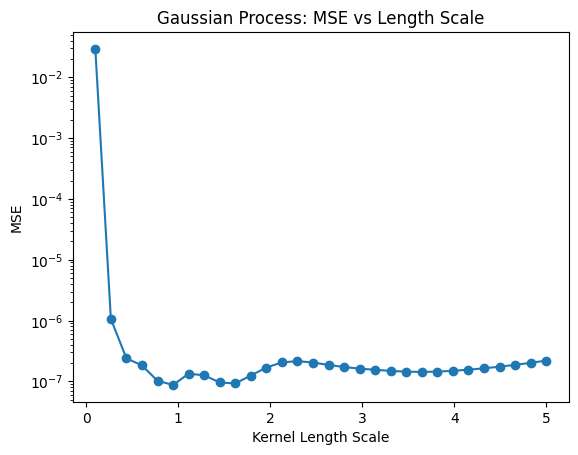

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Re-load data, scale, and split within this cell for self-containment
vis_data = pd.read_excel("viscosity_final dataset.xlsm")

X = vis_data[['X1_Temperature_C',
              'X2_Concentration',
              'X3_BaseFluid_viscosity']]
y = vis_data['Y_viscosity'].values.reshape(-1, 1)

X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y).ravel()

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)


length_scales = np.linspace(0.1, 5, 30)
mse_gp = []

for l in length_scales:
    # Set length_scale_bounds='fixed' to prevent the GPR from optimizing this parameter
    # This allows us to observe the MSE for the specific length_scale 'l'
    kernel = RBF(length_scale=l, length_scale_bounds='fixed')
    model = GaussianProcessRegressor(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_gp.append(mean_squared_error(y_test, y_pred))

plt.figure()
plt.plot(length_scales, mse_gp, marker='o', linestyle='-')
plt.xlabel("Kernel Length Scale")
plt.ylabel("MSE")
plt.title("Gaussian Process: MSE vs Length Scale")
plt.yscale('log') # Use a logarithmic scale for the y-axis
plt.show()

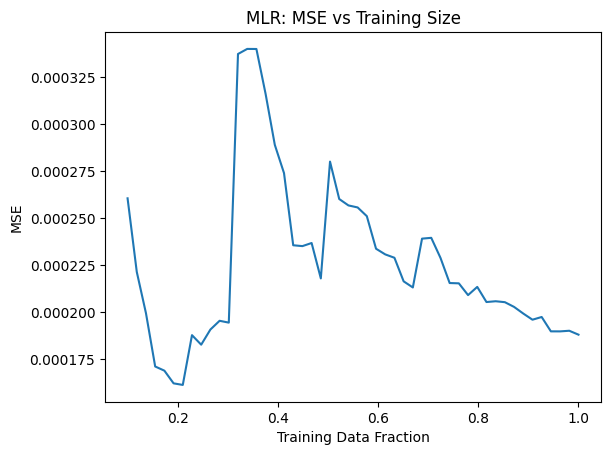

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Increased the number of points for train_sizes to make the graph smoother
train_sizes = np.linspace(0.1, 1.0, 50)
mse_mlr = []

for size in train_sizes:
    split = int(len(X_train) * size)
    model = LinearRegression()
    model.fit(X_train[:split], y_train[:split])
    y_pred = model.predict(X_test)
    mse_mlr.append(mean_squared_error(y_test, y_pred))

plt.figure()
plt.plot(train_sizes, mse_mlr)
plt.xlabel("Training Data Fraction")
plt.ylabel("MSE")
plt.title("MLR: MSE vs Training Size")
plt.show()

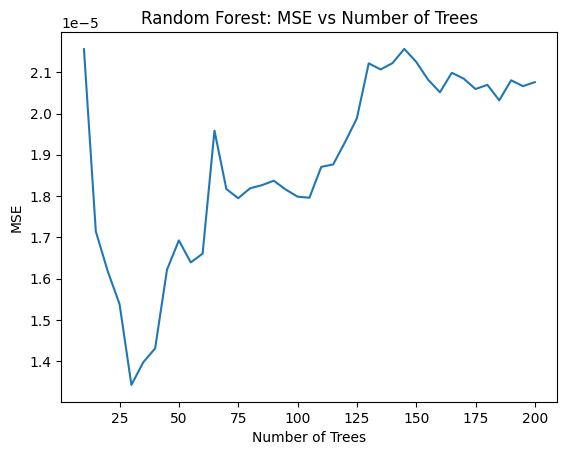

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Increased the number of points for 'trees' to make the graph smoother and more detailed
trees = range(10, 201, 5) # Changed step from 10 to 5
mse_rf = []

for t in trees:
    model = RandomForestRegressor(
        n_estimators=t,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_rf.append(mean_squared_error(y_test, y_pred))

plt.figure()
plt.plot(trees, mse_rf)
plt.xlabel("Number of Trees")
plt.ylabel("MSE")
plt.title("Random Forest: MSE vs Number of Trees")
plt.show()

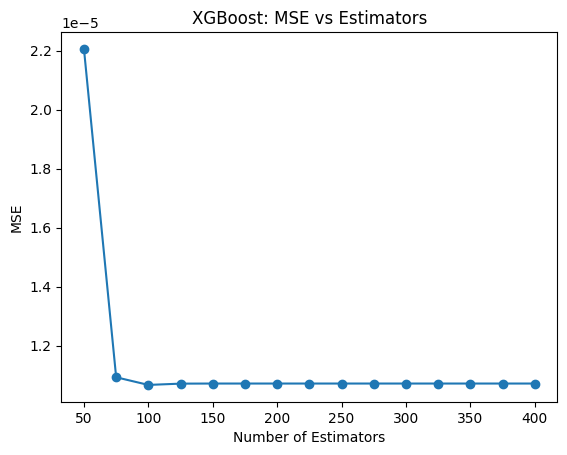

In [64]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Increased the number of points for 'estimators' to make the graph smoother and more detailed
estimators = range(50, 401, 25) # Changed step from 50 to 25
mse_xgb = []

for e in estimators:
    model = XGBRegressor(
        n_estimators=e,
        learning_rate=0.1,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_xgb.append(mean_squared_error(y_test, y_pred))

plt.figure()
plt.plot(estimators, mse_xgb, marker='o', linestyle='-') # Added marker to explicitly show data points
plt.xlabel("Number of Estimators")
plt.ylabel("MSE")
plt.title("XGBoost: MSE vs Estimators")
plt.show()

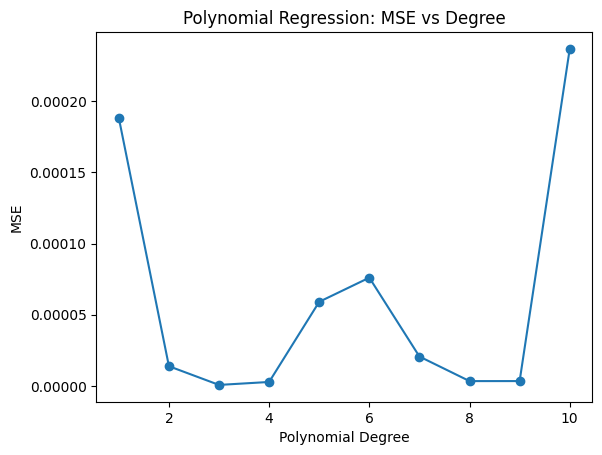

In [65]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

degrees = range(1, 11)
mse_poly = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse_poly.append(mean_squared_error(y_test, y_pred))

plt.figure()
plt.plot(degrees, mse_poly, marker='o', linestyle='-') # Added marker to explicitly show data points
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.title("Polynomial Regression: MSE vs Degree")
# Limiting the y-axis to better visualize the lower MSE values
# plt.ylim(0, 0.02) # Adjust this limit as needed to clearly see the low MSE region
plt.show()

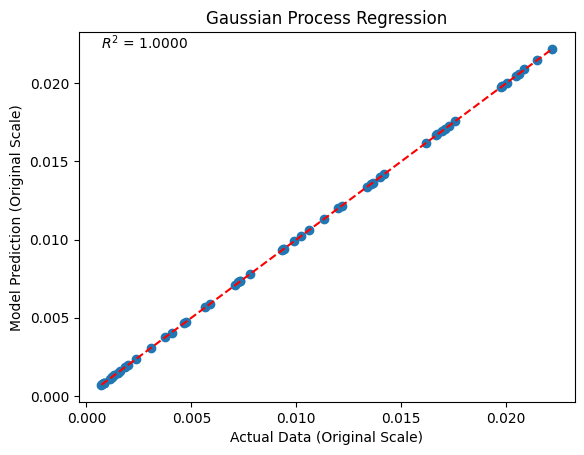

In [66]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import r2_score # Import r2_score
import matplotlib.pyplot as plt

# Reusing the successfully trained gpr model and inverse-transformed predictions/true values
# These were computed in cells C3cs04CSYN1s (gpr fitting) and VrhGcW8cYShD (inverse transform)
y_pred_gp = y_test_pred
y_true_gp = y_test_true

r2_gp = r2_score(y_true_gp, y_pred_gp)

plt.figure()
plt.scatter(y_true_gp, y_pred_gp)
plt.plot([y_true_gp.min(), y_true_gp.max()],
         [y_true_gp.min(), y_true_gp.max()],
         'r--')
plt.xlabel("Actual Data (Original Scale)")
plt.ylabel("Model Prediction (Original Scale)")
plt.title("Gaussian Process Regression")
plt.text(y_true_gp.min(), y_pred_gp.max(), f"$R^2$ = {r2_gp:.4f}")
plt.show()

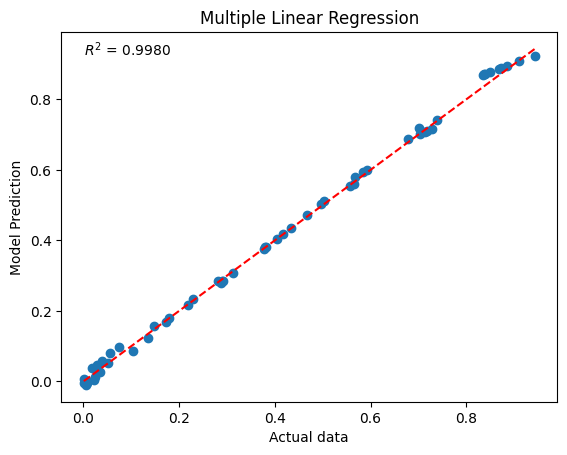

In [67]:
from sklearn.linear_model import LinearRegression

mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)
y_pred_mlr = mlr_model.predict(X_test)

r2_mlr = r2_score(y_test, y_pred_mlr)

plt.figure()
plt.scatter(y_test, y_pred_mlr)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual data")
plt.ylabel("Model Prediction")
plt.title("Multiple Linear Regression")
plt.text(y_test.min(), y_pred_mlr.max(), f"$R^2$ = {r2_mlr:.4f}")
plt.show()


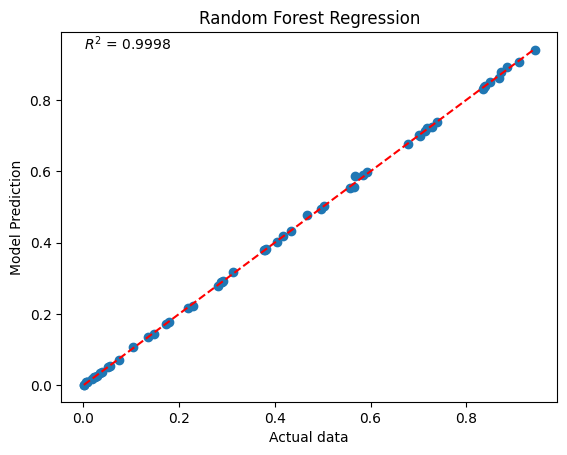

In [68]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)

plt.figure()
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual data")
plt.ylabel("Model Prediction")
plt.title("Random Forest Regression")
plt.text(y_test.min(), y_pred_rf.max(), f"$R^2$ = {r2_rf:.4f}")
plt.show()


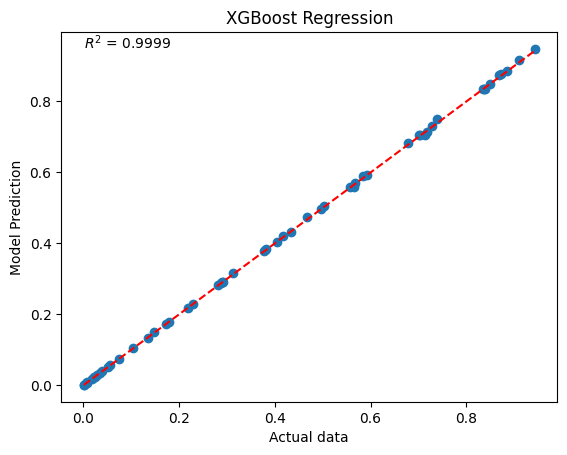

In [69]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)

plt.figure()
plt.scatter(y_test, y_pred_xgb)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual data")
plt.ylabel("Model Prediction")
plt.title("XGBoost Regression")
plt.text(y_test.min(), y_pred_xgb.max(), f"$R^2$ = {r2_xgb:.4f}")
plt.show()


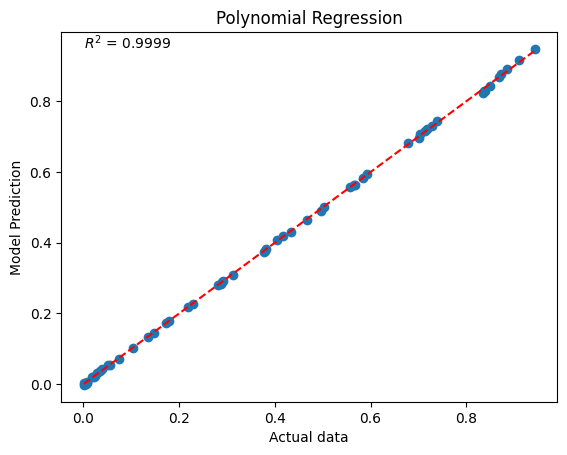

In [70]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

r2_poly = r2_score(y_test, y_pred_poly)

plt.figure()
plt.scatter(y_test, y_pred_poly)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual data")
plt.ylabel("Model Prediction")
plt.title("Polynomial Regression")
plt.text(y_test.min(), y_pred_poly.max(), f"$R^2$ = {r2_poly:.4f}")
plt.show()
